### Dependencies, includes, paths

In [1]:
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

import numpy as np
import pandas as pd

import smsa.data_import
import smsa.pearson

BASE_PATH    = 'C:/Users/pavel/github/SMSA/'
DATA_PATH    = f'{BASE_PATH}/data/NASDAQ-100/'
TICKERS_PATH = f'{BASE_PATH}/data/NASDAQ-100.csv'

### Data Import

In [2]:
tickers = smsa.data_import.read_tickers(TICKERS_PATH)
tickers = tickers[:100]
data_for_ticker = smsa.data_import.read_historical_data(tickers, DATA_PATH)

table = smsa.data_import.merge_table(data_for_ticker)
table = table.dropna(axis='columns')
table = smsa.data_import.table_logret(table)

logrets_mtx = table.loc[:, table.columns != 'Date']
sample_size = logrets_mtx.shape[0]
print(f'sample_size: {sample_size}')

sample_size: 252


### $ h_{ij}: \gamma_{i,j} >= \gamma_{0} \quad \text{ против } \quad k_{ij}: \gamma_{i,j} < \gamma_{0}$
(Построение доверительного множества связанных акций фондового рынка)

## Sanity Testing

In [3]:
import smsa.plots
import smsa.pearson
import smsa.kendall
import smsa.sign
import smsa.mtcs

def sanity_testing(testerClass, suptitle):
    return smsa.plots.plot_tests(logrets_mtx,
                          sample_size,
                          testerClass=testerClass,
                          corrections=[None, smsa.mtcs.bonferroni, smsa.mtcs.holm, smsa.mtcs.hochberg, smsa.mtcs.benjamini],
                          corrections_names=['None', 'BNF', 'HLM', 'HBG', 'BJM'],
                          significance_lvl=0.1,
                          thresholds=[-0.99, 0.2, 0.4, 0.6, 0.99],
                          figsize=(16, 18),
                          suptitle=suptitle
    )    

### Pearson

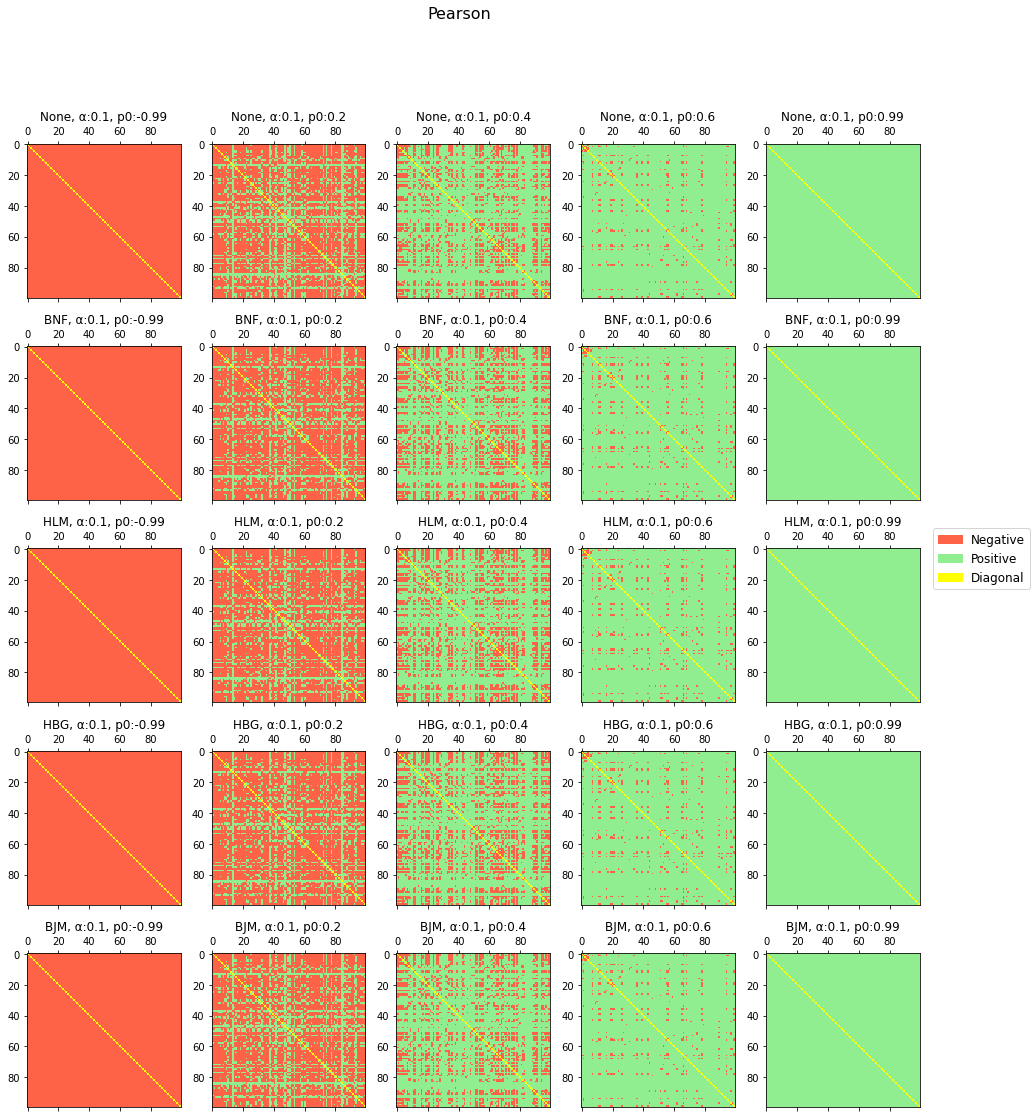

In [4]:
sanity_testing(smsa.pearson.CSTestPearson, "Pearson")

### Sign

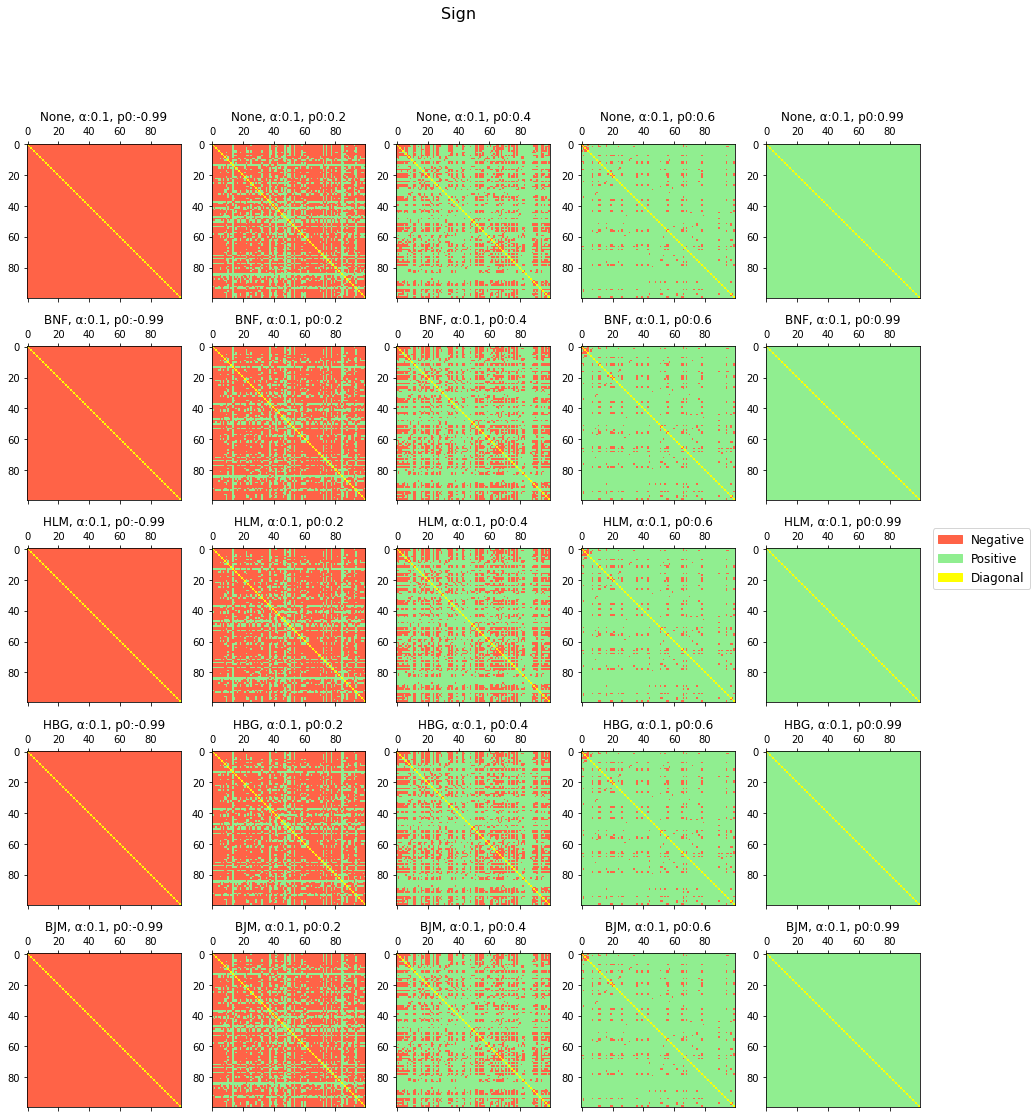

In [5]:
sanity_testing(smsa.pearson.CSTestPearson, "Sign")

### Kendall

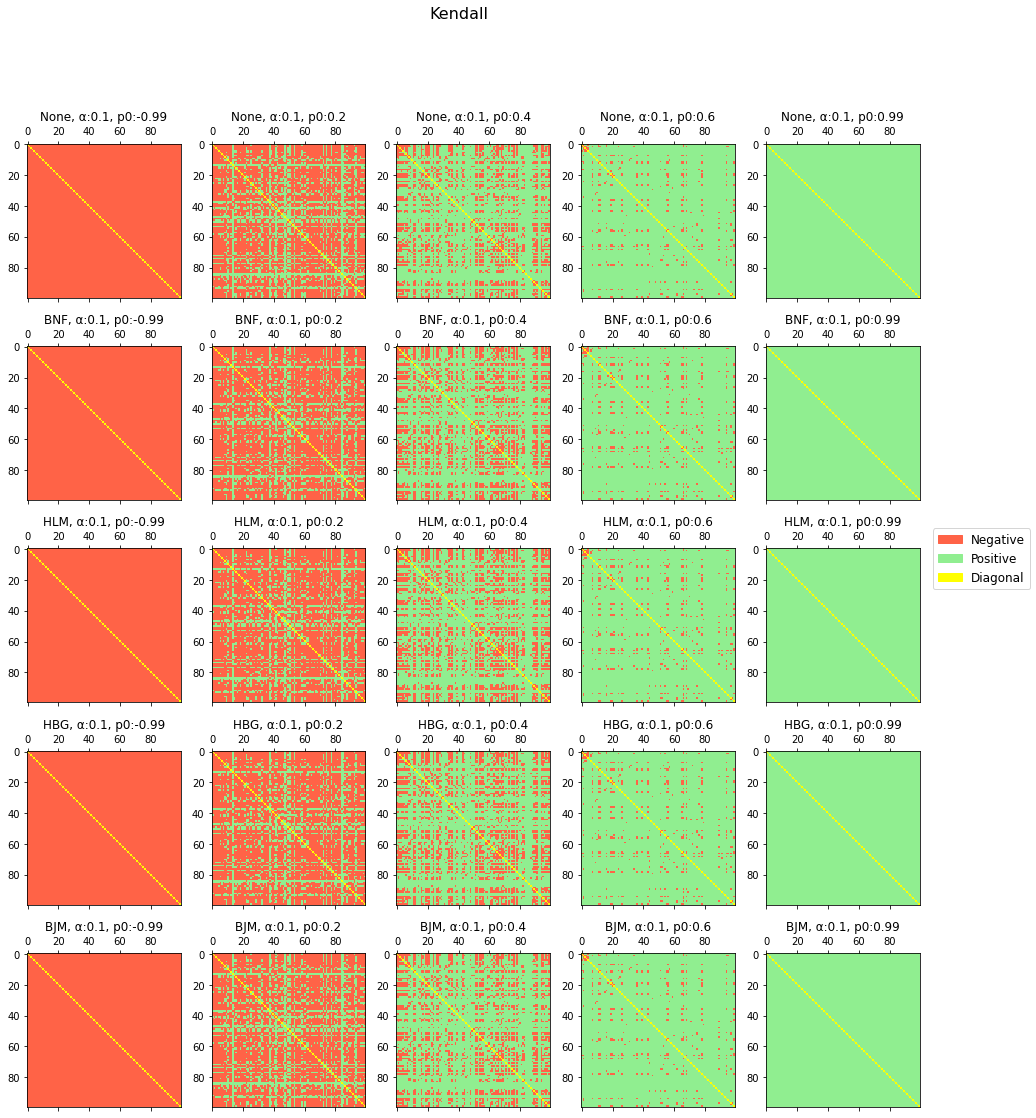

In [6]:
sanity_testing(smsa.pearson.CSTestPearson, "Kendall")